In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

In [46]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [47]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery revies column

In [48]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')

In [69]:
baner_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1137 non-null   object 
 1   locality          1137 non-null   object 
 2   ratings           851 non-null    float64
 3   off               968 non-null    object 
 4   delivery_reviews  1010 non-null   object 
 5   cuisine           1137 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.4+ KB


In [70]:
baner_copy

Name locality  ratings                off  \
0               McDonald's    Baner      4.1            ₹50 OFF   
1               Nawab Asia    Baner      4.1            ₹50 OFF   
2                   Mithas    Baner      4.3            ₹50 OFF   
3                Anna Idli    Baner      4.2            ₹50 OFF   
4     Dadu's Sweet Emporio    Baner      4.3            ₹50 OFF   
...                    ...      ...      ...                ...   
1132                 WYNKK    Baner      NaN            50% OFF   
1133              Ai Shiwu    Baner      3.6            50% OFF   
1134    Mumbaian Pav Bhaji    Baner      3.2            50% OFF   
1135      Shree Datta Bhel    Baner      3.9            50% OFF   
1136               Eggie's    Baner      3.8  Pro extra 25% OFF   

     delivery_reviews                                            cuisine  
0              9810                         Burger, Fast Food, Beverages  
1              3054    North Indian, Chinese, Mughlai, Biryani, Desse...  
2              2262                                  Mithai, Street Food  
3               21800                            South Indian, Beverages  
4              4504                       Mithai, Street Food, Ice Cream  
...               ...                                                ...  
1132      Not nough               Bar Food, North Indian, Mughlai, Asian  
1133           1146                                 Chinese, Asian, Thai  
1134             46                                          Street Food  
1135             15                                          Street Food  
1136             87                              North Indian, Fast Food  

[1137 rows x 6 columns]

In [71]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

In [72]:
baner_copy

Name locality  ratings                off  \
0               McDonald's    Baner      4.1            ₹50 OFF   
1               Nawab Asia    Baner      4.1            ₹50 OFF   
2                   Mithas    Baner      4.3            ₹50 OFF   
3                Anna Idli    Baner      4.2            ₹50 OFF   
4     Dadu's Sweet Emporio    Baner      4.3            ₹50 OFF   
...                    ...      ...      ...                ...   
1132                 WYNKK    Baner      NaN            50% OFF   
1133              Ai Shiwu    Baner      3.6            50% OFF   
1134    Mumbaian Pav Bhaji    Baner      3.2            50% OFF   
1135      Shree Datta Bhel    Baner      3.9            50% OFF   
1136               Eggie's    Baner      3.8  Pro extra 25% OFF   

     delivery_reviews                                            cuisine  
0              9810                         Burger, Fast Food, Beverages  
1              3054    North Indian, Chinese, Mughlai, Biryani, Desse...  
2              2262                                  Mithai, Street Food  
3               21800                            South Indian, Beverages  
4              4504                       Mithai, Street Food, Ice Cream  
...               ...                                                ...  
1132      Not nough               Bar Food, North Indian, Mughlai, Asian  
1133           1146                                 Chinese, Asian, Thai  
1134             46                                          Street Food  
1135             15                                          Street Food  
1136             87                              North Indian, Fast Food  

[1137 rows x 6 columns]

In [73]:
bavdhan_copy

Name locality  ratings                off  \
0               Domino's Pizza  Bavdhan      4.2  Pro extra 15% OFF   
1      Kinara's Maratha Darbar  Bavdhan      3.9            50% OFF   
2                       Palavi  Bavdhan      4.1  Pro extra 15% OFF   
3                     Giridhar  Bavdhan      4.1  Pro extra 15% OFF   
4               Sujata Mastani  Bavdhan      4.2  Pro extra 10% OFF   
..                         ...      ...      ...                ...   
829             Rolling Bistro  Bavdhan      4.2            50% OFF   
830        Peter's Momo Center  Bavdhan      4.4            50% OFF   
831           Hotel Marathwada  Bavdhan      3.3            50% OFF   
832                   D Palace  Bavdhan      3.8            50% OFF   
833  Indore Poha And Diet Poha  Bavdhan      3.3            50% OFF   

    delivery_reviews                                            cuisine  
0             6291                Pizza, Fast Food, Desserts, Beverages  
1             1507        Maharashtrian, Chinese, North Indian, Biryani  
2             8144    Chinese, Fast Food, North Indian, South Indian...  
3              11100          North Indian, South Indian, Maharashtrian  
4              132                       Beverages, Desserts, Ice Cream  
..               ...                                                ...  
829            168                                    Fast Food, Burger  
830            497                                                Momos  
831            175                          North Indian, Maharashtrian  
832           1067    North Indian, Chinese, Seafood, Mughlai, Desserts  
833             23                                          Street Food  

[834 rows x 6 columns]

In [74]:
hinjewadi_copy

Name   locality  ratings                off  \
0            Rohit Wadewale  Hinjewadi      3.8  Pro extra 15% OFF   
1                       KFC  Hinjewadi      4.1            50% OFF   
2             Biryani by KG  Hinjewadi      3.6  Pro extra 15% OFF   
3      Reddy's Biryani Zone  Hinjewadi      4.0            50% OFF   
4     Tamil Nadu Restaurant  Hinjewadi      3.9            50% OFF   
..                      ...        ...      ...                ...   
955          Kolhapur Tadka  Hinjewadi      NaN                NaN   
956  New Sugaran Bhojanalay  Hinjewadi      NaN            50% OFF   
957            Real Chinese  Hinjewadi      3.9                NaN   
958               S P Foods  Hinjewadi      NaN                NaN   
959              Blue Birds  Hinjewadi      NaN                NaN   

    delivery_reviews                                            cuisine  
0             8680    Maharashtrian, Street Food, South Indian, Sand...  
1             8463                         Burger, Fast Food, Beverages  
2              15800                     Biryani, Chinese, North Indian  
3             8859    North Indian, Seafood, Mughlai, Kebab, Chinese...  
4             3218                                         South Indian  
..               ...                                                ...  
955      Not nough    Biryani, North Indian, Chinese, Maharashtrian,...  
956            209                                         North Indian  
957      Not nough                                              Chinese  
958              NaN                                      Maharashtrian  
959      Not nough                                Chinese, North Indian  

[960 rows x 6 columns]

In [75]:
wakad_copy

Name locality  ratings      off  \
0                    Indori Sarafa    Wakad      4.0  50% OFF   
1                   Rohit Wadewale    Wakad      3.6  50% OFF   
2                    Global Punjab    Wakad      3.9  50% OFF   
3     Tatva The Vegetarian Kitchen    Wakad      4.0  50% OFF   
4                  Biryani By Kilo    Wakad      3.7  50% OFF   
...                            ...      ...      ...      ...   
1113                Spice Of India    Wakad      NaN      NaN   
1114                Special Bakery    Wakad      NaN      NaN   
1115                 Dadaji Sweets    Wakad      NaN  15% OFF   
1116    Rudra Snacks And Chiken 65    Wakad      NaN      NaN   
1117                      SG Foods    Wakad      NaN      NaN   

     delivery_reviews  cuisine  
0              6201        NaN  
1               601        NaN  
2              1890        NaN  
3               12900      NaN  
4              2728        NaN  
...               ...      ...  
1113      Not nough        NaN  
1114      Not nough        NaN  
1115      Not nough        NaN  
1116      Not nough        NaN  
1117      Not nough        NaN  

[1118 rows x 6 columns]

## HANDLING BANER DATA SET

In [76]:
baner_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1137 non-null   object 
 1   locality          1137 non-null   object 
 2   ratings           851 non-null    float64
 3   off               968 non-null    object 
 4   delivery_reviews  1010 non-null   object 
 5   cuisine           1137 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.4+ KB


In [79]:
baner_ratings = baner_copy.dropna(subset=['ratings'])

In [80]:
baner_ratings.reset_index(inplace = True, drop = True)

In [81]:
baner_ratings

Name locality  ratings                off  \
0              McDonald's    Baner      4.1            ₹50 OFF   
1              Nawab Asia    Baner      4.1            ₹50 OFF   
2                  Mithas    Baner      4.3            ₹50 OFF   
3               Anna Idli    Baner      4.2            ₹50 OFF   
4    Dadu's Sweet Emporio    Baner      4.3            ₹50 OFF   
..                    ...      ...      ...                ...   
846       Happy Da Punjab    Baner      3.7            50% OFF   
847              Ai Shiwu    Baner      3.6            50% OFF   
848    Mumbaian Pav Bhaji    Baner      3.2            50% OFF   
849      Shree Datta Bhel    Baner      3.9            50% OFF   
850               Eggie's    Baner      3.8  Pro extra 25% OFF   

    delivery_reviews                                            cuisine  
0             9810                         Burger, Fast Food, Beverages  
1             3054    North Indian, Chinese, Mughlai, Biryani, Desse...  
2             2262                                  Mithai, Street Food  
3              21800                            South Indian, Beverages  
4             4504                       Mithai, Street Food, Ice Cream  
..               ...                                                ...  
846             69                North Indian, Chinese, Kebab, Malwani  
847           1146                                 Chinese, Asian, Thai  
848             46                                          Street Food  
849             15                                          Street Food  
850             87                              North Indian, Fast Food  

[851 rows x 6 columns]

In [78]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True)

In [ ]:
baner_ratings.columns=baner_ratings.columns.str.replace('[(,)]','')

In [ ]:
baner_ratings

<AxesSubplot:ylabel='Density'>

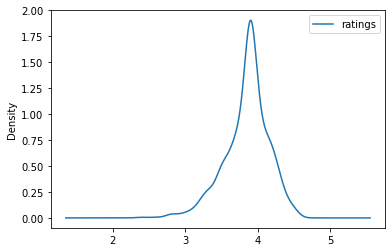

In [82]:
baner_ratings.plot(x="Name", y="ratings", kind="kde")

<Figure size 72000x720 with 0 Axes>

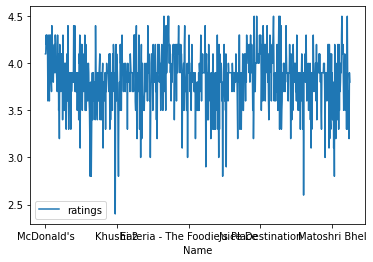

In [83]:
plt.figure(figsize = (1000,10))
baner_ratings.plot(x="Name", y="ratings")
plt.show()

## HANDLING BAVDHAN DATA SET

In [ ]:
bavdhan_copy.info()

## HANDLING HINJEWADI DATA SET

In [ ]:
hinjewadi_copy.info()

## HANDLING WAKAD DATA SET

In [ ]:
wakad_copy.info()

In [ ]:
df = pd.concat([baner_copy, bavdhan_copy, hinjewadi_copy, wakad_copy])

In [ ]:
df

In [ ]:
df.info()

## Ratings null and Not null count

### BANER

In [84]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

Null values in Baner data set: 286


In [85]:
baner_copy['ratings'].notnull().sum()

851

### BAVDHAN

In [86]:
bavdhan_copy['ratings'].isna().sum()

217

In [87]:
bavdhan_copy['ratings'].notnull().sum()

617

### HINJEWADI

In [88]:
hinjewadi_copy['ratings'].isna().sum()

250

In [89]:
hinjewadi_copy['ratings'].notnull().sum()

710

### WAKAD

In [90]:
wakad_copy['ratings'].isna().sum()

337

In [91]:
wakad_copy['ratings'].notnull().sum()

781

In [93]:
baner_ratings.isna().sum()

Name                 0
locality             0
ratings              0
off                 58
delivery_reviews     0
cuisine              0
dtype: int64

In [95]:
baner_copy.isnull().sum()

Name                  0
locality              0
ratings             286
off                 169
delivery_reviews    127
cuisine               0
dtype: int64